# Capstone 1 Milestone Report
## Molly McNamara

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from IPython.display import display,HTML
pd.set_option("display.max.columns",500)
pd.set_option("display.max.rows",500)
%matplotlib inline
pollution = pd.read_csv('~/Desktop/weatherpollution.csv', index_col='Unnamed: 0')
pollution['Date_Local']= pd.to_datetime(pollution['Date_Local'],  errors='raise', format='%Y/%m/%d')

### Introduction

High air pollution levels have been consistently documented as a major environmental risk to health. The World Health Organization has stated that the majority of the world’s population is living in areas that do not meet air quality guidelines and estimated that outdoor air pollution caused 3 million premature deaths in 2012. While programs do exist in many countries to combat air pollution with the aim of reducing levels of harmful pollutants, weather patterns and geographical features can also influence the concentration of air pollution in certain urban areas. 

Given the health risks involved in elevated levels of air pollutants, it would be useful for health care providers and hospitals to predict the incidence of respiratory illnesses during periods of poor air quality. Prediction of periods of increased patient illness could help with planning for hospital staffing needs as well as preventative care and messaging to reduce hospital visits. Staffing in particular is a challenge hospitals face, due to an anticipated shortfall in registered nurses. By 2025, researchers expect a shortage “more than twice as large as any nurse shortage experienced since the introduction of Medicare and Medicaid in the mid-1960s" ([Health Affairs, 2009](https://www.healthaffairs.org/doi/abs/10.1377/hlthaff.28.4.w657)).  Given the challenges facing the health care system in the United States, there is a tremendous financial incentive to better manage high risk patients.

The hypothetical client in this case is Kaiser Permanente, a large managed care organization that runs a number of hospitals and clinics with an emphasis on preventive care and population health management. Prediction of air quality incidents that may affect population health and cause a spike in emergency room visits and hospitalizations may help Kaiser staff their clinics accordingly and in advance rather than face nursing shortages that could impact quality of care, wait times or their quality metrics.

### The Data

The primary dataset consists of daily levels of 4 primary air pollutants (Nitrogen Dioxide, Sulphur Dioxide, Carbon Monoxide and Ozone) and their air quality indices from major cities across the United States between 2000 and 2016. The data is sourced from the United States Environmental Protection Agency and downloaded from a [compiled set at Kaggle](https://www.kaggle.com/sogun3/uspollution/data).

The supplementary dataset consists of climate data collected by the [National Oceanic and Atmospheric Administration](https://www.ncdc.noaa.gov/cdo-web/search) (NOAA) for 7 of the largest US cities in the pollution dataset from January 1, 2000 through December 31, 2015. The variables include elevation of the city, daily precipitation, and the daily high and low temperatures.

### Data Wrangling

The pollution dataset was imported into iPython notebook and determined to consist of 1,746,661 observations with 28 columns.  Further evaluation revealed that there were multiple duplicate/triplicate observations for many days at the same site.  When this duplicate data was removed (by grouping by date and site and then retaining the mean value for each variable), the dataset consisted of one row for each date for each site, for a total of 412,856 rows.

Columns that would not be used in analysis were dropped; specifically the columns for state and city code, address of testing site, and units of measure for pollutant levels were removed.  The column for local date was converted to a datetime object. The dataset was evaluated for null/empty fields and the Carbon Monoxide Air Quality Index was determined to have a number of missing values; these were replaced using fillna.

Boxplots were generated to evaluate the spread of each pollutant's Air Quality Index by state. Finally, the columns of the dataset were renamed to make them easier to work with going forward.  A clean CSV file was saved.

All data wrangling steps for this dataset can be found [here](https://github.com/bouncebarkrun/Springboard-Data-Science-Career-Track/blob/master/1st%20Capstone%20Project/Capstone%201%20Data%20Wrangling.ipynb).

The weather dataset was imported into iPython notebook and determined to consist of 40,770 observations with 8 columns. The column for local date was converted to a datetime object.  The dataset was evaluated for null/empty fields and the precipitation, maximum temperature and minimum temperature columns were determined to have a number of missing/null values.  Precipitation frequently is a real 0 so this was left unchanged.  The missing maximum and minimum temperature values were replaced using forward fill. The columns of the dataset were renamed to make them easier to work with going forward and to match the nomenclature of date and city in the pollution dataframe.  Finally, the pollution and weather dataframes were merged on a left join by City and Date.  A clean CSV file was saved.

All data wrangling steps for this additional data can be found [here](https://github.com/bouncebarkrun/Springboard-Data-Science-Career-Track/blob/master/1st%20Capstone%20Project/Capstone%201%20Data%20Wrangling%20Add%20On.ipynb).

Ideally, this analysis could be supplemented with emergency room visit and hospitalization data to support the outcome of hazardous pollution levels resulting in an increased rate of health care utilization.  This association is well supported in the literature ([Epidemiology](http://journals.lww.com/epidem/Abstract/2004/01000/Ambient_Air_Pollution_and_Cardiovascular_Emergency.9.aspx), [American Journal of Epidemiology](https://academic.oup.com/aje/article/153/5/444/149769), [Epidemiology](http://journals.lww.com/epidem/Abstract/2005/03000/Ambient_Air_Pollution_and_Respiratory_Emergency.4.aspx)).  However, the only publicly available data found were annual rates of ER/hospital visits by state or county, rather than the granular daily/weekly data that would be useful for this analysis.

### Initial Findings

The pollution data comes from 141 cities in 46 US states (plus 3 cities in Mexico).  

Air Quality Index values equate to health concerns as follows, per the [Environmental Protection Agency](https://airnow.gov/index.cfm?action=aqibasics.aqi):
* 0 to 50 Good
* 51 to 100 Moderate
* 101 to 150 Unhealthy for Sensitive Groups
* 151 to 200 Unhealthy
* 201 to 300 Very Unhealthy
* 301 to 500 Hazardous

As seen in the table below, the four pollutants measured range from 0 (Good) to Unhealthy for Sensitive Groups (Nitrogen Dioxide) to Unhealthy (Sulfur Dioxide) to Very Unhealthy (Carbon Monoxide and Ozone). On average, based on the mean, they tend to be in the Good rating and so being able to predict those excursions into unsafe levels could be useful.

In [2]:
AQI = ['NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']
pollution[AQI].describe()

,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI
count,412856.000000,412856.000000,412856.000000,412856.000000
mean,24.038367,35.964773,7.245721,6.042532
std,15.274345,19.623752,12.034155,5.940870
min,0.000000,0.000000,0.000000,0.000000
25%,12.000000,25.000000,1.000000,2.000000
50%,23.000000,33.000000,3.000000,5.000000
75%,34.000000,42.000000,9.000000,8.000000
max,132.000000,218.000000,200.000000,201.000000


/Users/mollymcnamara/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/Users/mollymcnamara/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


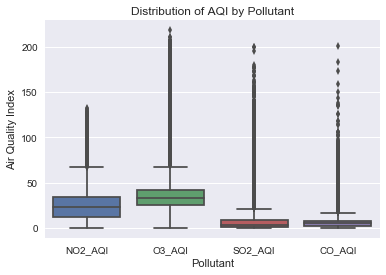

In [3]:
AQI = ['NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']
sns.boxplot(pollution[AQI])
plt.xlabel('Pollutant')
plt.ylabel('Air Quality Index')
plt.title('Distribution of AQI by Pollutant')
plt.show()

The pollutant levels were visually assessed for the 10 largest cities in the US to compare the distributions and confirmed that each city has a unique and seasonal profile.  Their fluctuations were also evaluated over time.

As three of the 10 largest cities in the country had less than 8 years of data, the 7 largest cities (with 15+ years of tracking) were further evaluated with inferential statistical tests. These cities were New York, Los Angeles, Houston, Phoenix, Philadelphia, San Diego, and Dallas.  The pollutant data does not appear to be normally distributed (except for mean daily ozone levels). This may be a function of many values close to 0 or some sort of natural limit. The pollutant levels were assessed relative to the historical weather record to identify any correlations.

In [4]:
the7cities = ['New York', 'Los Angeles', 'Houston', 'Phoenix', 'Philadelphia', 'San Diego', 'Dallas']
pollution7 = pollution[pollution['City'].isin(the7cities)]
colsofinterest = ['NO2_AQI', 'NO2_Mean', 'O3_AQI', 'O3_Mean', 'SO2_AQI', 'SO2_Mean','CO_AQI', 'CO_Mean', 'Elevation', 'Precipitation', 'TempMax', 'TempMin']
pollution7[colsofinterest].corr()

,NO2_AQI,NO2_Mean,O3_AQI,O3_Mean,SO2_AQI,SO2_Mean,CO_AQI,CO_Mean,Elevation,Precipitation,TempMax,TempMin
NO2_AQI,1.000000,0.881274,0.045223,-0.255967,0.291974,0.285725,0.658486,0.626278,0.140556,-0.107773,-0.031722,-0.218325
NO2_Mean,0.881274,1.000000,-0.157326,-0.464975,0.363908,0.399538,0.705560,0.710177,0.052518,-0.085097,-0.180954,-0.337537
O3_AQI,0.045223,-0.157326,1.000000,0.803566,-0.139647,-0.194459,-0.150828,-0.160482,0.205611,-0.113583,0.519679,0.450026
O3_Mean,-0.255967,-0.464975,0.803566,1.000000,-0.237105,-0.276438,-0.353471,-0.343462,0.098733,-0.090900,0.432067,0.456356
SO2_AQI,0.291974,0.363908,-0.139647,-0.237105,1.000000,0.869305,0.212616,0.227979,-0.193016,-0.024529,-0.246591,-0.268050
SO2_Mean,0.285725,0.399538,-0.194459,-0.276438,0.869305,1.000000,0.246987,0.281580,-0.187934,-0.040518,-0.338154,-0.335841
CO_AQI,0.658486,0.705560,-0.150828,-0.353471,0.212616,0.246987,1.000000,0.945793,0.147338,-0.096545,-0.095540,-0.210896
CO_Mean,0.626278,0.710177,-0.160482,-0.343462,0.227979,0.281580,0.945793,1.000000,0.069613,-0.088833,-0.123343,-0.200408
Elevation,0.140556,0.052518,0.205611,0.098733,-0.193016,-0.187934,0.147338,0.069613,1.000000,-0.083237,0.326839,0.154783
Precipitation,-0.107773,-0.085097,-0.113583,-0.090900,-0.024529,-0.040518,-0.096545,-0.088833,-0.083237,1.000000,-0.075372,-0.003910


Further statistical investigation of the stronger correlations between weather conditions and pollutant levels showed that the relationships are statistically significant.  The next step for the project will involve evaluating the best model to predict pollutant levels based on historical weather conditions.

Complete exploratory data analysis can be found [here](https://github.com/bouncebarkrun/Springboard-Data-Science-Career-Track/blob/master/1st%20Capstone%20Project/Capstone%201%20EDA.ipynb). Complete inferential statistics can be found [here](https://github.com/bouncebarkrun/Springboard-Data-Science-Career-Track/blob/master/1st%20Capstone%20Project/Capstone%201%20Inferential%20Statistics.ipynb).